# [AI-ML: Machine Learning](https://csed.acm.org/final-report/)
## CS Core: Session 3

CS Core Topics

<ul>
    <li style="list-style-type: none;">2. Fundamental ideas:
        <ul>
            <li style="list-style-type: none;">a. No free lunch theorem: no one learner can solve all problems; representational design decisions have consequences.</li>
            <li style="list-style-type: none;">b. Sources of error and undecidability in machine learning</li>
        </ul>
    </li>
    <li style="list-style-type: none;">5. Working with Data
        <ul>
            <li style="list-style-type: none;">a. Data preprocessing
                <ul>
                    <li style="list-style-type: none;">i. Importance and pitfalls of preprocessing choices</li>
                </ul>
            </li>
            <li style="list-style-type: none;">b. Handling missing values (imputing, flag-as-missing)
                <ul>
                    <li style="list-style-type: none;">i. Implications of imputing vs flag-as-missing</li>
                </ul>
            </li>
            <li style="list-style-type: none;">c. Encoding categorical variables, encoding real-valued data</li>
            <li style="list-style-type: none;">d. Normalization/standardization</li>
            <li style="list-style-type: none;">e. Emphasis on real data, not textbook examples</li>
        </ul>
    </li>
    <li style="list-style-type: none;">6. Representations
        <ul>
            <li style="list-style-type: none;">a. Hypothesis spaces and complexity</li>
            <li style="list-style-type: none;">b. Simple basis feature expansion, such as squaring univariate features</li>
            <li style="list-style-type: none;">c. Learned feature representations</li>
        </ul>
    </li>
</ul>

## Data Wrangling and Data Preprocessing
https://scikit-learn.org/stable/modules/preprocessing.html


**[Data wrangling](https://en.wikipedia.org/wiki/Data_wrangling)**, also known as **data munging**, primarily focuses on **cleaning and transforming raw data** to make it suitable for further analysis. This process involves:

1. **Data discovery:** Familiarizing with and understanding the data
2. **Structuring:** Organizing the data
3. [**Cleaning:**](https://en.wikipedia.org/wiki/Data_cleansing) Transforming the data to a standard, consistent representation that may contain missing values, but is unlikely to contain erroneous entries
4. **Enriching:** Adding additional data when beneficial
5. **Validating:** Applying validation rules iteratively to assure data consistency, quality, and security (similar to repeated Structuring and Cleaning)
6. **Publishing:** Preparing the dataset for use, documenting steps taken during data wrangling

The main objective of data wrangling is to ensure that the dataset is **accurate, consistent, and free from anomalies**, providing a reliable foundation for any subsequent analytical or modeling tasks.

**[Machine Learning data preprocessing](https://en.wikipedia.org/wiki/Data_preprocessing)** encompasses a broader set of activities that include data wrangling as one of its foundational steps. In addition to cleaning and transforming data, ML data preprocessing involves:

Examples of methods used in data preprocessing include [data cleaning](https://en.wikipedia.org/wiki/Data_cleansing), [instance selection](https://en.wikipedia.org/wiki/Instance_selection), [data normalization](https://en.wikipedia.org/wiki/Normalization_(statistics)) and [standardization](https://en.wikipedia.org/wiki/Canonical_form#Computing), [one-hot encoding](https://en.wikipedia.org/wiki/One-hot#Machine_learning_and_statistics), [data transformation](), and [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering), and [feature selection](https://en.wikipedia.org/wiki/Feature_selection).  Here, we will focus on a subset of data preprocessing topics:

- **Handling Missing Values:** Removing or imputing missing data values
- **Encoding Categorical Variables:** Converting categorical data into numerical formats using techniques like [one-hot encoding](https://en.wikipedia.org/wiki/One-hot#Machine_learning_and_statistics) or label encoding
- **Encoding Real Variables:** Discretizing real values into discrete ["bins"](https://en.wikipedia.org/wiki/Data_binning)
- **[Normalization](https://en.wikipedia.org/wiki/Normalization_(statistics)) and [Standardization](https://en.wikipedia.org/wiki/Canonical_form#Computing):**  Transforming data into standard ranges, formats, etc., to make them better suited to machine learning algorithms
- [**Feature Engineering:**](https://en.wikipedia.org/wiki/Feature_engineering) [Selecting](https://en.wikipedia.org/wiki/Feature_selection), creating, [transforming](https://en.wikipedia.org/wiki/Data_transformation_(statistics)), and extracting data features

Thus, **Data Wrangling** is a subset of **ML Data Preprocessing** focused on **cleaning and transforming** data to ensure its quality and usability, whereas **ML Data Preprocessing** extends beyond wrangling by including **feature engineering**, **scaling**, **encoding**, and **data splitting** to tailor the data for **machine learning models**.


### Handling Missing Values

One difficult task of data preprocessing is deciding how to handle missing values.  Although some ML models can handle missing values, e.g. [Decision Trees classifiers/regressors and ensembles thereof](https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values), we often need to make difficult decisions about how to handle missing values in our data.  To illustrate, we will draw heavily from Leanne and Justin's ["Data Cleaning in Python: the Ultimate Guide (2020)"](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) that, in turn, applies different techniques for handling missing values in the [Kaggle Sberbank Russian Housing Market Competition](https://www.kaggle.com/c/sberbank-russian-housing-market).  One can read a [description of the data columns](https://www.kaggle.com/c/sberbank-russian-housing-market/data) there in file ```data_dictionary.txt```.

First, we will demonstrate three techniques for understanding where missing values exist in our dataset:
- Missing data heatmap visualization
- Missing data percentage by feature (dataframe column)
- Missing data histogram count of missing values per observation (dataframe row, a.k.a instance)

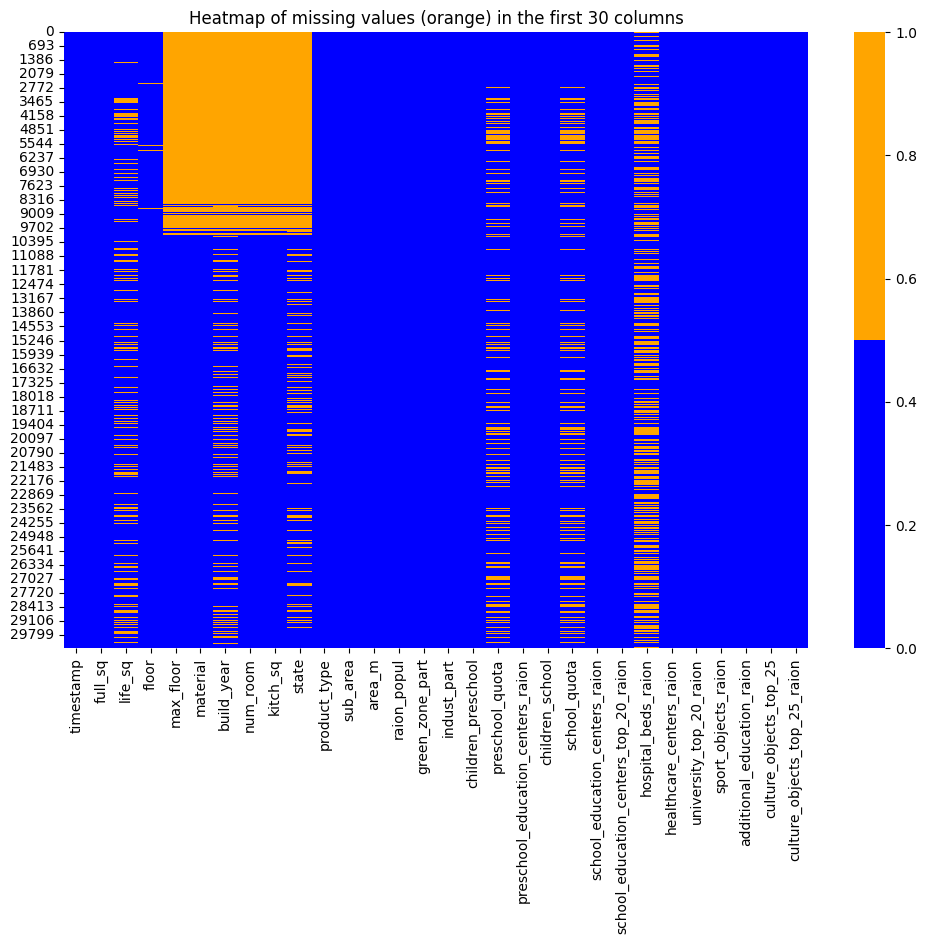

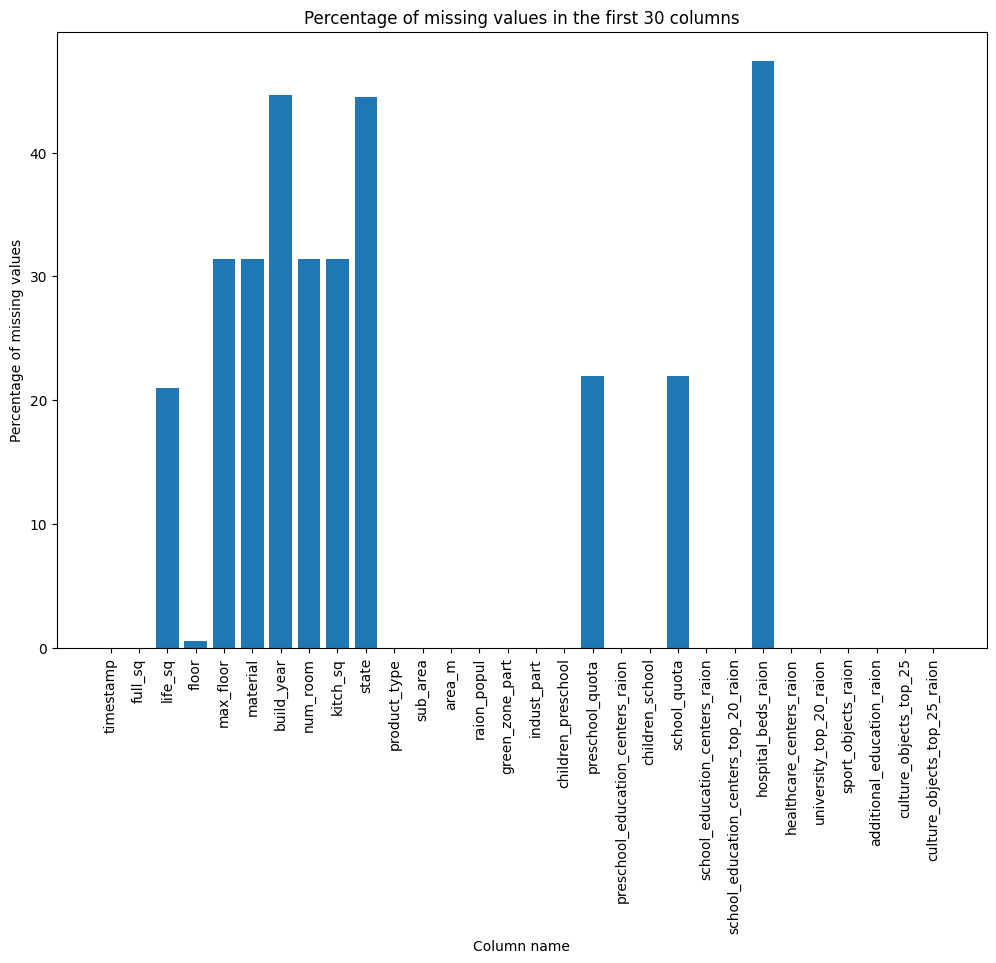

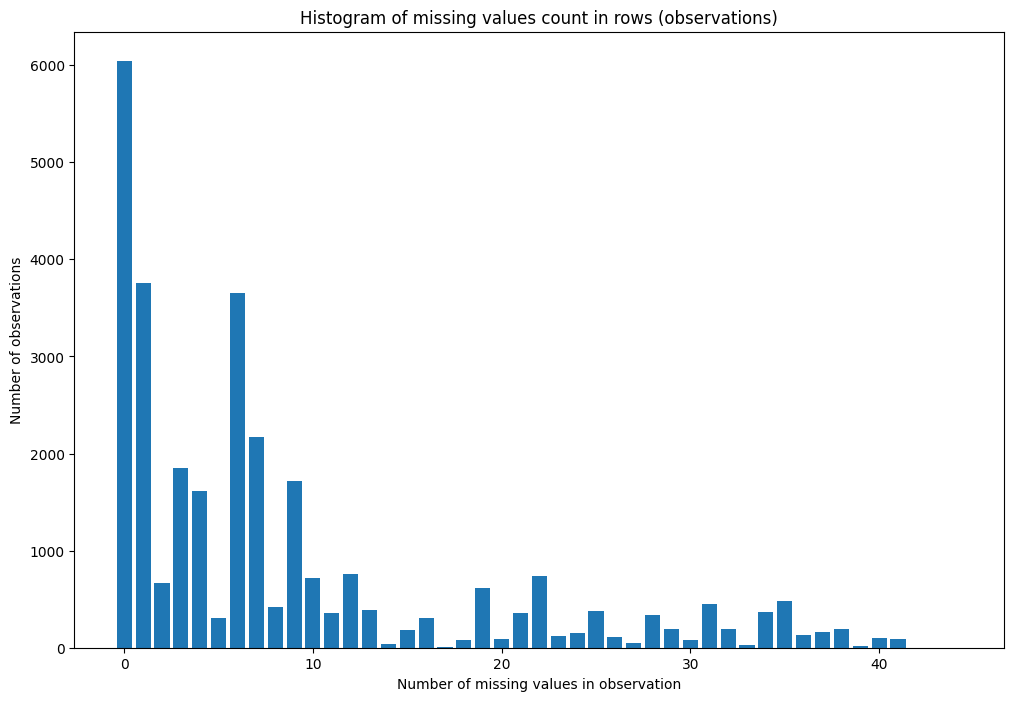

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sberbank.csv')
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
plt.rcParams['figure.figsize'] = (12,8)

# Missing data heatmap visualization
cols = df.columns[1:31] # first 30 columns (not including first 'id' column)
ax = plt.axes()
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(['blue', 'orange']))
ax.set_title('Heatmap of missing values (orange) in the first 30 columns')
plt.show()

# Missing data percentage by feature (dataframe column)
pct_missing_cols = [100 * np.mean(df[col].isnull()) for col in cols]
plt.bar(cols, pct_missing_cols)
plt.xticks(rotation=90)
plt.xlabel('Column name')
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values in the first 30 columns')
plt.show()

# Missing data histogram count of missing values per observation (dataframe row, a.k.a instance)
missing_count_by_row = [np.sum(row.isnull()) for _, row in df.iterrows()]
missing_count_freq = pd.Series(missing_count_by_row).value_counts().sort_index()
plt.bar(missing_count_freq.index, missing_count_freq.values)
plt.xlabel('Number of missing values in observation')
plt.ylabel('Number of observations')
plt.title('Histogram of missing values count in rows (observations)')
plt.show()


Thus, we see that we can have inputs (features, columns) for which many of our data points (observations, rows) are missing values.  We can also have individual data points (observations, rows) that are missing many input (feature, column) values.  A good first step of data preprocessing is getting a sense of where we have missing values.

There is no concensus for how to handle missing values.  Here are four ways that people handle missing values:
- Dropping (i.e. deleting) observations (rows)
- Dropping features (columns)
- Imputing (i.e. predicting) missing values
- Flagging missing values

#### Dropping observations

We can simply drop all rows with any missing values.  We did this in session 1 with the Palmer Penguin dataset.  Alternatively, we can drop all rows that have less than a certain threshold of completeness. 

In [64]:
# Print the full dataframe shape (rows, columns)
print('Original dataframe shape:', df.shape)

# Create a new dataframe dropping rows with any missing values
df_no_missing = df.dropna()
print('New dataframe shape after dropping rows with any missing values:', df_no_missing.shape)

# Create a new dataframe dropping rows with 35 missing values or more
max_missing_cols_threshold = 35
min_filled_cols_threshold = df.shape[1] - max_missing_cols_threshold
df_lt_35_missing = df.dropna(thresh=min_filled_cols_threshold)  # thresh is the minimum number of non-missing values required per row
print('New dataframe shape after dropping rows with 35 missing values or more:', df_lt_35_missing.shape)


Original dataframe shape: (30471, 292)
New dataframe shape after dropping rows with any missing values: (6042, 292)
New dataframe shape after dropping rows with 35 missing values or more: (29779, 292)


#### Dropping features

We can also drop all columns with any missing values.  Alternatively, we could drop columns that either (1) have a lot of missing values, or (2) are useless for prediction.

In [65]:
# Print the full dataframe shape (rows, columns)
print('Original dataframe shape:', df.shape)

# Create a new dataframe dropping columns with any missing values
df_no_missing_cols = df.dropna(axis=1)
print('New dataframe shape after dropping columns with any missing values:', df_no_missing_cols.shape)

# Create a new dataframe dropping columns where more than 25% of the values are missing
max_missing_rows_threshold = 0.25
min_filled_rows_threshold = df.shape[0] * (1 - max_missing_rows_threshold)
df_lt_25pct_missing_cols = df.dropna(axis=1, thresh=min_filled_rows_threshold)  # thresh is the minimum number of non-missing values required per column
print('New dataframe shape after dropping columns with more than 25% missing values:', df_lt_25pct_missing_cols.shape)

# Create a new dataframe dropping the id column 0
df_no_id = df.drop(columns=['id'])
print('New dataframe shape after dropping the id column:', df_no_id.shape)

Original dataframe shape: (30471, 292)
New dataframe shape after dropping columns with any missing values: (30471, 241)
New dataframe shape after dropping columns with more than 25% missing values: (30471, 282)
New dataframe shape after dropping the id column: (30471, 291)


#### Imputing or flagging missing values

Another approach is to fill in missing values.  The drawback is that introducing false data can degrade our predictions.  In practice, imputed values could be the average value for the feature, from some predictor we build for that feature from other features, or a unique "flagging" value distinct from other values that is code for "unknown".  (For categorical data, this could be a new category, "_UNKNOWN_".)  We illustrate each with the first feature that has significant missing values, 'life_sq', the living area of the home in square meters.  For this example, we will use feature 'full_sq', the total area in square meters, as the feature used for predicting the imputed value.

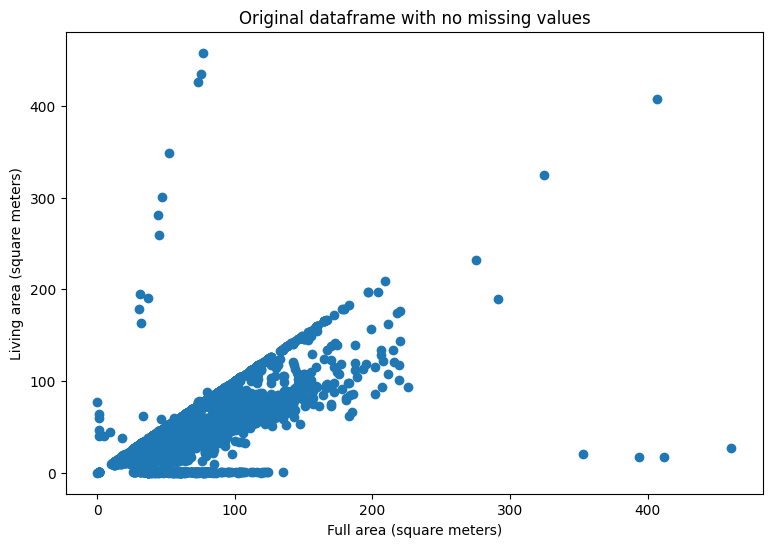

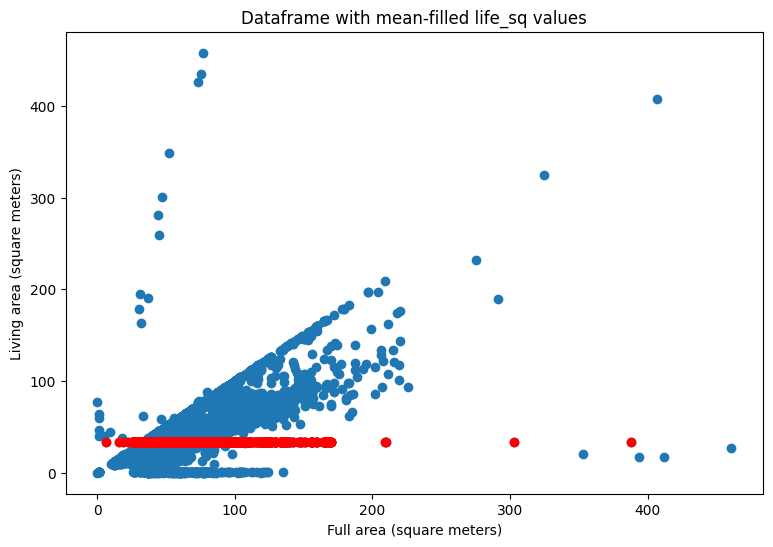

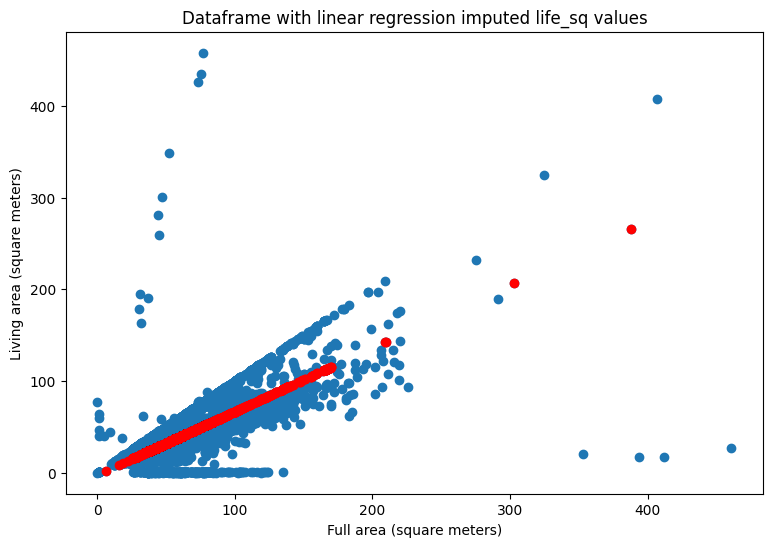

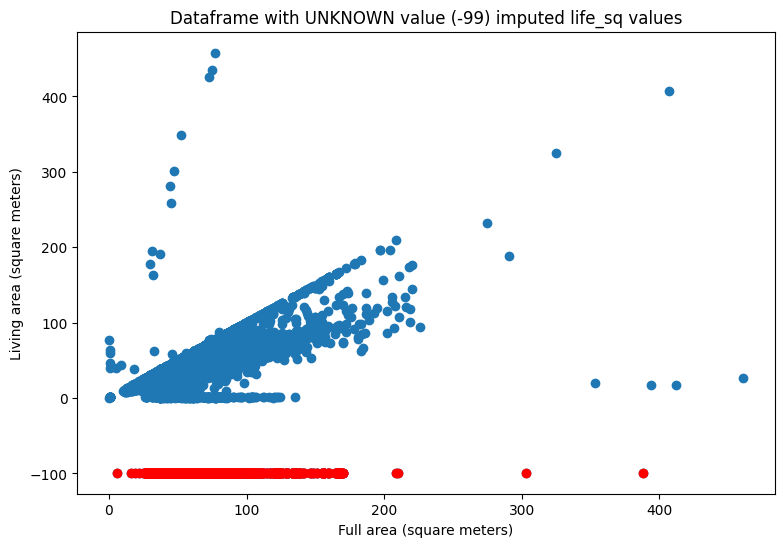

In [66]:
# For visualization purposes, we will drop outlier rows where 'full_sq' or 'life_sq' is greater than 250
df_no_outliers = df[(df['full_sq'] < 500) & ((df['life_sq'] < 500) | df['life_sq'].isnull())]

# Compute the rows where 'life_sq' is missing
missing_life_sq = df_no_outliers['life_sq'].isnull()

# Create a scatter plot of 'full_sq' vs 'life_sq' for the original dataframe with no missing values
plt.rcParams['figure.figsize'] = (9,6)
plt.scatter(df_no_outliers['full_sq'], df_no_outliers['life_sq'])
plt.xlabel('Full area (square meters)')
plt.ylabel('Living area (square meters)')
plt.title('Original dataframe with no missing values')
plt.show()

# Create a new dataframe with column 'life_sq' filled with the mean value of 'life_sq'.
df_life_sq_mean_filled = df_no_outliers.copy()
df_life_sq_mean_filled['life_sq'] = df_life_sq_mean_filled['life_sq'].fillna(df_life_sq_mean_filled['life_sq'].mean())

# Create a scatter plot of 'full_sq' vs 'life_sq' with the mean-filled 'life_sq' values, showing filled values in red
plt.scatter(df_no_outliers['full_sq'], df_life_sq_mean_filled['life_sq'])
plt.scatter(df_no_outliers['full_sq'][missing_life_sq], df_life_sq_mean_filled['life_sq'][missing_life_sq], color='red')
plt.xlabel('Full area (square meters)')
plt.ylabel('Living area (square meters)')
plt.title('Dataframe with mean-filled life_sq values')
plt.show()

# Create a Linear Regression model to predict 'life_sq' from 'full_sq' using the original dataframe with no missing values
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit the model to the data for rows where 'life_sq' is not missing
df_no_missing_life_sq = df_no_outliers.dropna(subset=['life_sq'])
model.fit(df_no_missing_life_sq[['full_sq']], df_no_missing_life_sq['life_sq'])

# Create a new dataframe imputing missing 'life_sq' values using this linear regression model
df_life_sq_linreg_imputed = df_no_outliers.copy()
# For rows with missing 'life_sq', replace with value with that predicted by the linear regression model
df_life_sq_linreg_imputed.loc[missing_life_sq, 'life_sq'] = model.predict(df_no_outliers[['full_sq']])[missing_life_sq]

# Create a scatter plot of 'full_sq' vs 'life_sq' with the linear regression imputed 'life_sq' values, showing filled values in red
plt.scatter(df_no_outliers['full_sq'], df_life_sq_linreg_imputed['life_sq'])
plt.scatter(df_no_outliers['full_sq'][missing_life_sq], df_life_sq_linreg_imputed['life_sq'][missing_life_sq], color='red')
plt.xlabel('Full area (square meters)')
plt.ylabel('Living area (square meters)')
plt.title('Dataframe with linear regression imputed life_sq values')
plt.show()

# Designate a distinct UNKNOWN value -99 for missing values in 'life_sq', and fill missing values with the with this value
df_life_sq_unknown_filled = df_no_outliers.copy()
df_life_sq_unknown_filled['life_sq'] = df_life_sq_unknown_filled['life_sq'].fillna(-99)

# Create a scatter plot of 'full_sq' vs 'life_sq' with the UNKNOWN value imputed 'life_sq' values, showing filled values in red
plt.scatter(df_no_outliers['full_sq'], df_life_sq_unknown_filled['life_sq'])
plt.scatter(df_no_outliers['full_sq'][missing_life_sq], df_life_sq_unknown_filled['life_sq'][missing_life_sq], color='red')
plt.xlabel('Full area (square meters)')
plt.ylabel('Living area (square meters)')
plt.title('Dataframe with UNKNOWN value (-99) imputed life_sq values')
plt.show()

Encoding missing values explicitly has the advantage of *letting the data speak for itself*.  A survey multiple choice answer of "Prefer not to respond" carries information itself.  Values left unfilled in a database can carry information.  Letting missing data be represented as missing in whatever form makes sense for the ML application can sometimes be the best choice.

### Encoding Categorical Values

**What does one do if one has categorical input data and wants to apply regression techniques that require numeric inputs?**  Suppose we have numeric input ```car_years``` and categorical input auto ```make``` (```Citroen```, ```Jeep```, and ```Toyota```) as input and numeric ```maintenance_cost``` output. 

Here's what _not_ to do: Assign ```make``` categories to unique integers and perform a linear/nonlinear regression.  Why is this a bad approach?  There's no reason to believe that these auto makes have an *ordering* such that the encoded integers would aid numerical regression in predicting ```maintenance_cost```.

Here's a better approach: Create new 1.0 / 0.0 (meaning True / False, respectively) numeric input features, one for each category, e.g. ```is_Citroen```, ```is_Jeep```, and ```is_Toyota```, and use these created binary category-indicating features in place of the original categorical input ```make```.

This is what is known as [One-Hot Encoding](https://en.wikipedia.org/wiki/One-hot#Machine_learning_and_statistics).  Each category value is represented by having exactly one of the created binary features having a "hot" (1) value with all others having value 0.  Let's see this at work.  First, we'll generate our demonstration data.

In [67]:
makes = ['Citroen', 'Jeep', 'Toyota']
num_makes = len(makes)
base_values = [114, 173, 58]
stdev = 10.0
year_factor = 1.5
max_year = 20

num_rows = 500
np.random.seed(0)
df = pd.DataFrame(np.random.randint(low=0, high=max_year + 1, size=(num_rows, 1)), columns=['car_years'])
rand_indices = np.random.randint(low=0, high=num_makes, size=(num_rows, 1))
make_vals = [makes[rand_indices[i][0]] for i in range(num_rows)]
noise = np.random.normal(0, stdev, num_rows)
cost_vals = [max(0, base_values[rand_indices[i][0]] + year_factor * (df['car_years'][i] - max_year / 2) + noise[i]) for i in range(num_rows)]
df['make'] = make_vals
df['maintenance_cost'] = cost_vals
df.head(10)

car_years     make  maintenance_cost
0         12  Citroen        113.115804
1         15   Toyota         76.001420
2          0     Jeep        157.679306
3          3   Toyota         47.022661
4          3   Toyota         44.726571
5          7     Jeep        163.778637
6          9     Jeep        169.646704
7         19   Toyota         73.454202
8         18     Jeep        199.883829
9          4   Toyota         52.248436

We can use the Scikit-Learn [```OneHotEncoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to generate an encoding that we can store so as to be able to encode future unseen data:

In [68]:
from sklearn import preprocessing
onehotencoder = preprocessing.OneHotEncoder()
# Reshape the make one-dimensional array to 2D as fit_transform expects a 2D array and fit the object 
make_ohe = onehotencoder.fit_transform(df.make.values.reshape(-1,1)).toarray()
print("Our one-hot-encoded make data:")
print(make_ohe)
# If we want to add this back into the original dataframe,
# 1) Create column names for the encoding.
one_hot_column_names = ["make_"+str(int(i)) for i in range(make_ohe.shape[1])]
print('New columns:', one_hot_column_names)
# 2) Create a new dataframe with these columns and our one-hot encoded data
dfOneHot = pd.DataFrame(make_ohe, columns = one_hot_column_names)
# 3) Concatentate our original dataframe df with the dataframe containing our new columns
df = pd.concat([df, dfOneHot], axis=1)
df.head()

Our one-hot-encoded make data:
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
New columns: ['make_0', 'make_1', 'make_2']


car_years     make  maintenance_cost  make_0  make_1  make_2
0         12  Citroen        113.115804     1.0     0.0     0.0
1         15   Toyota         76.001420     0.0     0.0     1.0
2          0     Jeep        157.679306     0.0     1.0     0.0
3          3   Toyota         47.022661     0.0     0.0     1.0
4          3   Toyota         44.726571     0.0     0.0     1.0

We've generated our demonstration data with a linear relationship, so we are now in a position to linearly regress ```maintenance_cost``` onto our numeric features: ```car_years```, ```make_0```, ```make_1```, and ```make_2```.

In [69]:
X = df[['car_years', 'make_0', 'make_1', 'make_2']]  # select input(s)
y = df[['maintenance_cost']]  # select output
linear_regressor = LinearRegression()  # create linear regression object
linear_regressor.fit(X, y)  # perform linear regression of output onto inputs
print('y-intercept:', linear_regressor.intercept_)  # print the y-intercept
print('X coefficient(s):', linear_regressor.coef_)  # print the x coefficient
print('R^2 score:', linear_regressor.score(X, y))  # print R^2 score

y-intercept: [99.8388885]
X coefficient(s): [[  1.44498922  -0.87481464  58.17773394 -57.3029193 ]]
R^2 score: 0.9624985477943347


From this model, we can see that our base cost prediction in the y-intercept.  We can also see that car_years contributes to cost increase, and that Jeeps and Toyotas respectively increase and decrease the expected cost.

Let suppose we have some new car data.  How can we use our learned model?  Thankfully, our ```OneHotEncoding``` object still exists for transforming the data.  

First, we'll generate a 3 data values as we did above but without values.

In [70]:
np.random.seed(6)
num_rows = 3
df_new = pd.DataFrame(np.random.randint(low=0, high=max_year + 1, size=(num_rows, 1)), columns=['car_years'])
rand_indices = np.random.randint(low=0, high=num_makes, size=(num_rows, 1))
make_vals = [makes[rand_indices[i][0]] for i in range(num_rows)]
noise = np.random.normal(0, stdev, num_rows)
df_new['make'] = make_vals
df_new

car_years     make
0         10  Citroen
1          9   Toyota
2          3     Jeep

Next we'll go through the same steps to reapply our stored one-hot encoding.  Note how we do not ```fit_transform``` as before, but simply ```transform```.


In [71]:
make_ohe = onehotencoder.transform(df_new.make.values.reshape(-1,1)).toarray()
print("Our one-hot-encoded make with new data:")
print(make_ohe)
# Create a new dataframe with these columns and our one-hot encoded data
dfOneHot = pd.DataFrame(make_ohe, columns = one_hot_column_names)
# 3) Concatentate our original dataframe df with the dataframe containing our new columns
df_new = pd.concat([df_new, dfOneHot], axis=1)
df_new.head()

Our one-hot-encoded make with new data:
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


car_years     make  make_0  make_1  make_2
0         10  Citroen     1.0     0.0     0.0
1          9   Toyota     0.0     0.0     1.0
2          3     Jeep     0.0     1.0     0.0

Finally, we can apply our linear regression model to predict maintenance cost values.

In [72]:
X = df_new[['car_years', 'make_0', 'make_1', 'make_2']]  # select input(s)
y = linear_regressor.predict(X)
print(y)
df_new['maintenance_cost'] = y
df_new

[[113.41396604]
 [ 55.54087217]
 [162.3515901 ]]


car_years     make  make_0  make_1  make_2  maintenance_cost
0         10  Citroen     1.0     0.0     0.0        113.413966
1          9   Toyota     0.0     0.0     1.0         55.540872
2          3     Jeep     0.0     1.0     0.0        162.351590

There are two final important things to note.  One is a caveat.  Notice that given any two of these one-hot encoded values starting with ```make_```, we can predict the third.  Therefore, if we're looking for patterns in our one-hot encoded data, we can fall into the "dummy variable" trap, causing problems with some techniques because there isn't independence among these inputs.  The solution is simple: drop any one of our ```make_``` variables from our model building.  Then a missing one-hot effectively encodes the dropped variable. 

If there *are* missing values, however, leave all one-hot encoded categories, and let a no-hot row indicate "missing value". 

The second important thing to note is that one-hot encoding becomes too computationally cumbersome when there are too many distinct categorical values.  For this difficulty, we do something similar, using a technique called ["the hashing trick"](https://en.wikipedia.org/wiki/Feature_hashing).  For example, in the task of Click-Through Rate Prediction, one may be given a large set of browsing history links for a large set of anonymized users.  The sites visited may be very numerous, but exhibit the [Power Law](https://en.wikipedia.org/wiki/Power_law), i.e. few sites visited many times and many sites visited few times.  A simple One-Hot Encoding with too many categorical values would create a very high-dimensional problem with associated computational time- and/or space-complexity issues.

Instead, one may simply compute a hash function on the categorical value, take the absolute value, and compute the modulus according to the desired number of hashed encodings.   As long as collisions do not occur for high-frequency categories, this approximate encoding can serve well. 

### Encoding Real Values

Sometimes, it can be beneficial to discretize or "bin" continuous real values, especially when the distribution of such values is far from uniform.  This can be as simple as computing [quantiles](https://en.wikipedia.org/wiki/Quantile) of a feature's values and treating each quantile as a category.  As an example, we'll generate normally distributed data and encode it as quintiles 0 through 4 meaning "lower", "lower_middle", "middle", "upper_middle", and "upper", respectively. 

In [73]:
# Create a dataframe with 10000 normally-distributed 'x' values.
np.random.seed(1)
x = np.random.normal(0, 1, 10000)
df = pd.DataFrame(x, columns=['x'])

# Use a KBinsDiscretizer with 5 bins to transform the 'x' values into 5 bins.
from sklearn.preprocessing import KBinsDiscretizer

# Create the KBinsDiscretizer object
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', random_state=0)

# Fit and transform the 'x' values using the discretizer
x_binned = discretizer.fit_transform(df[['x']])
df['x_binned'] = x_binned
df.head()


x  x_binned
0  1.624345       4.0
1 -0.611756       1.0
2 -0.528172       1.0
3 -1.072969       0.0
4  0.865408       4.0

The normally distributed values, while concentrated around 0.0 (with standard deviation 1) are evenly distributed among the bins:

In [74]:
# For each bin in increasing order, print the range of values in the bin and the number of values in the bin.
for bin_num in range(5):
    bin_values = df[df['x_binned'] == bin_num]['x']
    print(f'Bin {bin_num}: {len(bin_values)} values in the range [{bin_values.min()}, {bin_values.max()}]')

Bin 0: 2000 values in the range [-3.656440099254795, -0.823566773730729]
Bin 1: 2000 values in the range [-0.823443904193359, -0.23695809153172143]
Bin 2: 2000 values in the range [-0.23686861182782443, 0.25871572572125284]
Bin 3: 2000 values in the range [0.2587424943122645, 0.8413065329808217]
Bin 4: 2000 values in the range [0.8414093992470919, 4.026849044547378]


### Normalization and Standardization

**Normalization** in machine learning is a preprocessing technique used to rescale numerical features to a common range, typically between 0 and 1. This is often achieved using **min-max scaling**, where each data point is adjusted based on the minimum and maximum values of the feature:

$$X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$

Normalization ensures that all features contribute equally to the model's learning process, which is particularly important for algorithms sensitive to the scale of the data, such as **$k$-nearest neighbors** and **neural networks**.

Indeed, in Session 1, we performed normalization using a [```MinMaxScaler```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) on the Palmer Penguin dataset in order to improve the performance of $k$-Means Clustering.  The Scikit-Learn website has an excellent demonstration where they ["Compare the effect of different scalers on data with outliers"](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) using the California Housing dataset median income and average house occupancy.

**Standardization**, on the other hand, involves transforming features so that they have a **mean of zero** and a **standard deviation of one**. This process centers the data around zero and scales it based on the variability of the data:

$$X_{\text{standardized}} = \frac{X - \mu}{\sigma}$$

where \( \mu \) is the mean and \( \sigma \) is the standard deviation of the feature. Standardization is useful when the data follows a **Gaussian distribution** and is commonly used in algorithms like **principal component analysis** and **linear regression**, which assume that the data is centered around zero.

Both normalization and standardization are essential steps in data preprocessing to improve the performance and convergence of machine learning algorithms by ensuring that features are on a comparable scale.  Both the nature and raw distribution of the data, as well as the intended ML model may influence the choice of the best normalization or standardization method.

## Feature Engineering

In addition to preparing raw data features, one can also add new features derived from original features.  We have already seen this in action in Session 2 using a ```LinearRegression``` to perform polynomial regression.  Given $(x, y)$ input-output pairs, we engineered new features (columns) $x^2$, ..., $x^n$ for fitting an $n$-degree polynomial.  From the perspective of the model, it was seeking best-fit coefficients for a linear relationship between inputs and outputs, but among the inputs, the values in columns $x^2$, ..., $x^n$ were derived from the original given column $x$ and were thus "engineered" features.

This is a fairly simple form of feature engineering.  Sometimes, there can be interactions between given features that suggest the deriving/engineering of "interaction terms".  Consider the following synthetic data example that presents a mysterious relationship. 

               x1          x2          x3           y
count  500.000000  500.000000  500.000000  500.000000
mean     0.176208   -0.135924   -0.059572   16.738995
std      2.836360    2.988853    2.989460  143.496230
min     -4.944779   -4.950600   -4.953680 -296.568227
25%     -2.417834   -2.957984   -2.696848  -69.583129
50%      0.343568   -0.112551    0.018557   -5.115367
75%      2.595988    2.445826    2.567203  104.810696
max      4.997177    4.979341    4.911686  420.939579


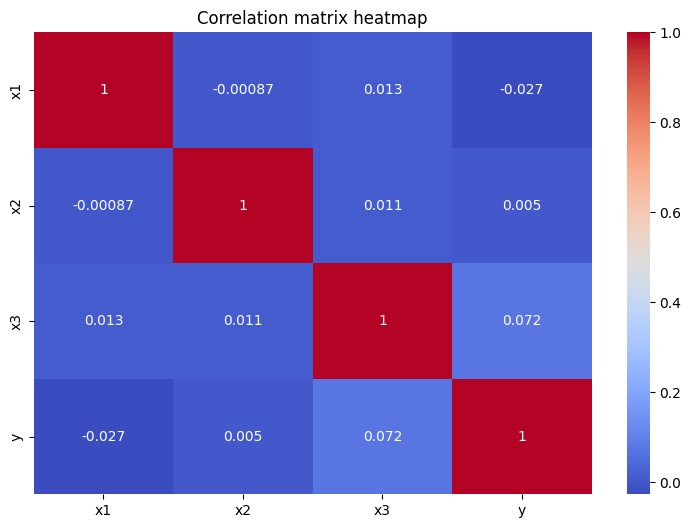

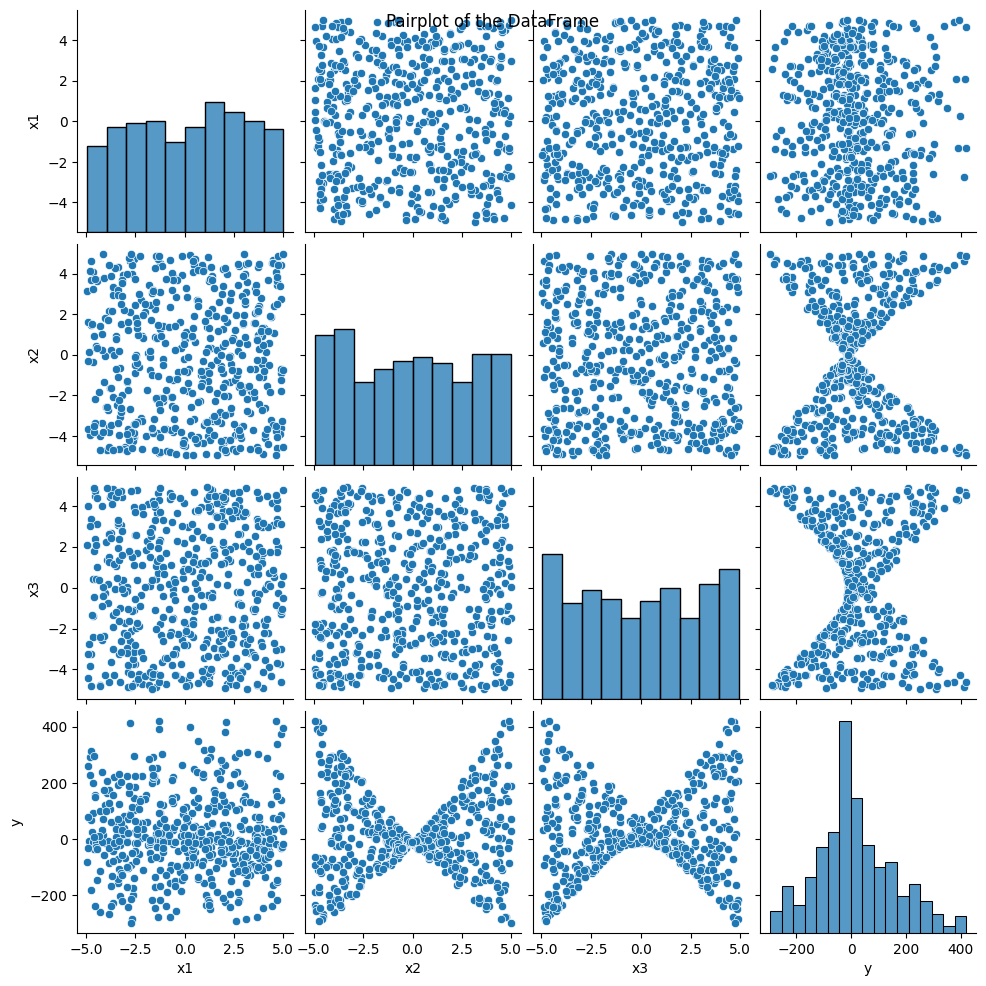

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load "interaction-terms.csv" into a DataFrame, drop the "id" column and print a summary.
df = pd.read_csv('interaction-terms.csv')
df = df.drop(columns=['id'])
print(df.describe())

# Display a correlation matrix heatmap and a pairplot of the DataFrame.
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')
plt.show()

sns.pairplot(df)
plt.suptitle('Pairplot of the DataFrame')
plt.show()


The correlation matrix heat map doesn't call out high correlations between the raw input features 'x1', 'x2', and 'x3' and the output 'y'.  However, a pair plot, i.e. a scatterplot for each pair of different columns, reveals non-uniform distributions of data.  We are not dealing with inputs unrelated to the output; we merely have not yet engineered features to help us better see the relationship.

Next we will engineer not only square terms for each input, but also *interaction terms* where we multiply different inputs together.

In [76]:
# Add squared terms and interactions terms for input features 'x1', 'x2', and 'x3' to the DataFrame.
df['x1_squared'] = df['x1'] ** 2
df['x2_squared'] = df['x2'] ** 2
df['x3_squared'] = df['x3'] ** 2
df['x1_x2'] = df['x1'] * df['x2']
df['x1_x3'] = df['x1'] * df['x3']
df['x2_x3'] = df['x2'] * df['x3']

input_features = ['x1', 'x2', 'x3', 'x1_squared', 'x2_squared', 'x3_squared', 'x1_x2', 'x1_x3', 'x2_x3']

# Compute the absolute values of the correlations of each input feature with the output feature 'y'.
correlations = df[input_features + ['y']].corr()['y'].abs().sort_values(ascending=False).drop('y')
print('Correlation absolute values with the output feature "y":')
print(correlations)



Correlation absolute values with the output feature "y":
x2_x3         0.983170
x2_squared    0.109178
x3            0.072377
x1_x3         0.045917
x1_x2         0.044268
x1            0.026558
x1_squared    0.019326
x3_squared    0.013745
x2            0.005044
Name: y, dtype: float64


### Interaction Terms

We then see that 'x2' times 'x3' has a very high absolute correlation with 'y'.  Other terms matter significantly less.  One method of exploring tradeoffs between simpler models and more complex models is to start with no input terms and try adding each single unused term to the model to see which yields the greatest increase in performance, e.g. $R^2$ score.  Here we illustrate the technique, called "forward selection" for 4 iterations:

In [77]:
from sklearn.linear_model import LinearRegression

unused_features = input_features.copy()
included_features = []

# Forward selection loop
print('Forward Selection:')
print('Feature Added \tR^2 Score')
for _ in range(4):
    best_feature = None
    best_score = 0
    for feature in unused_features:
        X = df[included_features + [feature]]
        y = df['y']
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)
        if score > best_score:
            best_score = score
            best_feature = feature
    included_features.append(best_feature)
    unused_features.remove(best_feature)
    print(f' {best_feature:10} \t{best_score}')



Forward Selection:
Feature Added 	R^2 Score
 x2_x3      	0.9666240879413422
 x2_squared 	0.9999499799914222
 x3_squared 	0.9999502226606491
 x2         	0.9999504301979064


From this exercise of forward selection, we see that feature 'x2_x3' yielded the highest explanatory power, 'x2_squared' improved the model to near perfect, and further complexity did not significantly improve the model performance.  Let us then build a model with these first two engineered features (including one squared and one interaction term), to see the model learned and visualize the original data and model predictions with respect to these variables.

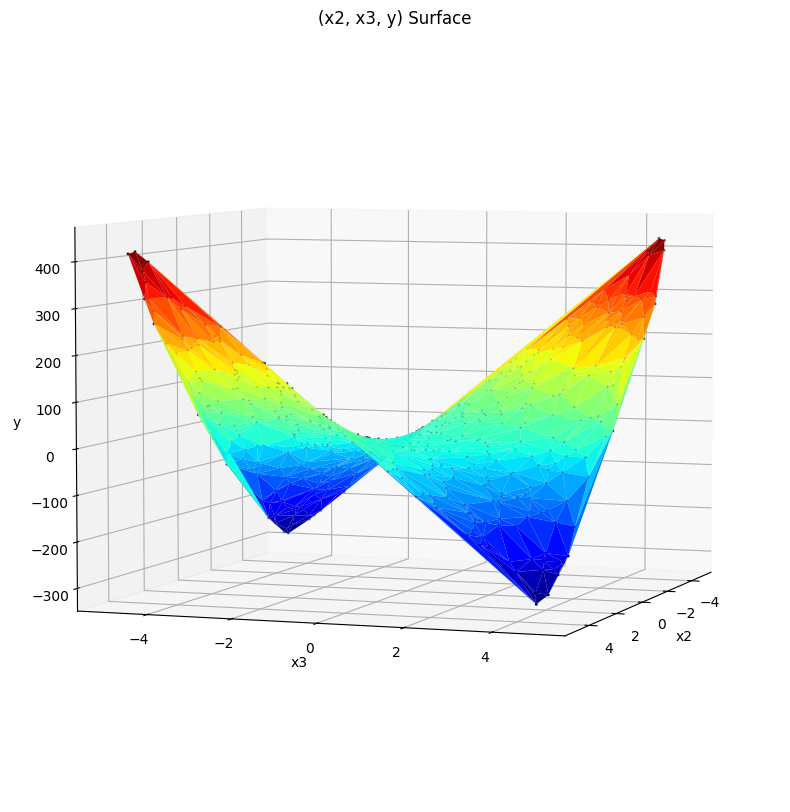

Model coefficients: [-15.62212234   3.43240934]
Model intercept: -12.27425172838139


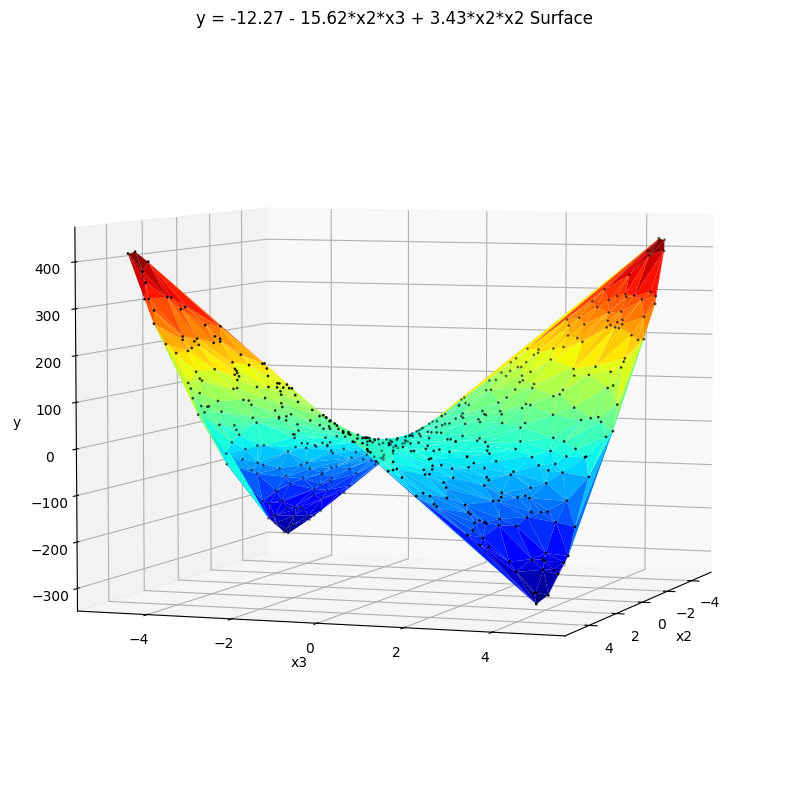

In [78]:
# Learn a linear regression model regressing 'y' onto 'x2_x3' and 'x2_squared'.
X = df[['x2_x3', 'x2_squared']]
y = df['y']
model = LinearRegression()
model.fit(X, y)

# Visualize the data surface using a 3D plot.
import matplotlib.tri as mtri
fig = plt.figure(figsize=(10,10))  # set the figure size
ax = fig.add_subplot(111, projection='3d')  # Initialize...
ax.view_init(elev=5, azim=20)  # set the elevation and the azimuth (angles up-down, left-right) of the view
ax.scatter3D(df['x2'], df['x3'], df['y'], s=1, c='black');  # x1-x2-y 3D scatterplot with size 1 dots and grayscale coloring
triang = mtri.Triangulation(df['x2'], df['x3'])  # create a triangular mesh between the irregular (i.e. non-grid-mesh) x1, x2 points
ax.plot_trisurf(triang, df['y'], cmap='jet')  # rainbow-colored ("jet") surface plot of triangular mesh
ax.set_xlabel('x2')  # set the x-axis label
ax.set_ylabel('x3')  # set the y-axis label
ax.set_zlabel('y')  # set the z-axis label
ax.set_title('(x2, x3, y) Surface')  # set the plot title
plt.show()

# Visualize the predicted data surface using a 3D plot.
y_pred = model.predict(X)
print('Model coefficients:', model.coef_)
print('Model intercept:', model.intercept_)
fig = plt.figure(figsize=(10,10))  # set the figure size
ax = fig.add_subplot(111, projection='3d')  # Initialize...
ax.view_init(elev=5, azim=20)  # set the elevation and the azimuth (angles up-down, left-right) of the view
ax.scatter3D(df['x2'], df['x3'], y_pred, s=1, c='black');  # x1-x2-y 3D scatterplot with size 1 dots and grayscale coloring
triang = mtri.Triangulation(df['x2'], df['x3'])  # create a triangular mesh between the irregular (i.e. non-grid-mesh) x1, x2 points
ax.plot_trisurf(triang, df['y'], cmap='jet')  # rainbow-colored ("jet") surface plot of triangular mesh
ax.set_xlabel('x2')  # set the x-axis label
ax.set_ylabel('x3')  # set the y-axis label
ax.set_zlabel('y')  # set the z-axis label
ax.set_title('y = -12.27 - 15.62*x2*x3 + 3.43*x2*x2 Surface')  # set the plot title
plt.show()

While this is an artificial example with simple data, we illustrate an important method of additive model building with engineered features.  However, feature engineering can often involve keen insight to the problem yielded by either human expertise or by features suggested from other ML models.  Let us consider engineered feature examples from games where we wish to estimate the relative goodness/badness of a game state to allow a player to distinguish between good and bad lines of play.

Chess players have long assigned different Chess pieces different [point values](https://www.chessprogramming.org/Point_Value) relative to each other.  For example, players have commonly assigned the pawn, knight, bishop, rook, and queen to have relative point values of 1, 3, 3, 5, and 9.  Thus a common engineered feature is relative material value, i.e. the remaining white piece values minus the remaining black piece values.  For the position shown, white has 5 pawns, a bishop, rook, and queen for material value of $5 \times 1 + 0 \times 3 + 1 \times 3 + 1 \times 5 + 1 \times 9 = 22$, whereas black has 4 pawns and 2 rooks for material values of $4 \times 1 + 0 \times 3 + 0 \times 3 + 2 \times 5 + 0 \times 9 = 14$.  Thus the relative material value is $22 - 14 = 8$, a crude measure of the white player's advantage.  This engineered feature of material advantage is the simplest in a long history of Chess [heuristic evaluation](https://www.chessprogramming.org/Evaluation).

<center><img src="chess.png" alt="Chess position" width="25%"></center>

In the game of Mancala, it has long been known that relative score is a strong feature for predicting the goodness/badness of a game state.  More recently, ML models have shown that relative mobility, the number of legal moves for the first player minus the number of legal moves for the second player, is also a good feature for predicting the goodness/badness of a game state.

<center><img src="mancala.png" alt="Mancala position" width="30%"></center>

In the board above, the first and second player score pits are to the far right and far left, respectively, so the relative score of white to black is $12 - 6 = 6$ points to the first player's advantage.  However, the first and second player play pits are the 6 along the bottom and top edges, respectively.  Play is from non-empty pits on the player's side, so the first player's relative mobility is $2 - 3 = -1$ legal plays, to the first player's disadvantage.  A dataset for experimenting with machine learning for Mancala can be found at the [FairKalah assignment website](http://modelai.gettysburg.edu/2022/fairkalah/) under "Data Resources".  

Whether Chess material advantage, Mancala relative mobility, [Connect Four](https://en.wikipedia.org/wiki/Connect_Four) major/minor threats (with 2 or 3 pieces of a possible 4 in a row) in relative positions, or many other such examples, Computer Game researchers often seek to learn or engineer new features and heuristic evaluations of game boards in order to predict good game outcomes from game states.

For the general Data Scientist, good *exploratory data analysis*, where one becomes deeply familiar with the data, can suggest new features that would be beneficial to engineer.  In the ["EDA to Prediction(DieTanic)"](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic) notebook, for example, Ashwini Swain found that it was helpful to add an engineered feature of whether a person was traveling alone or with family on the Titanic as helpful predictor of survival of the Titanic's sinking.

While it is important to let data speak for itself, good feature engineering can amplify and clarify what is being said.

## Fundamental Ideas of Machine Learning:

* *The NFL (No Free Lunch) Theorem of Machine Learning* - Wolpert and Macready summarize their ["No Free Lunch Theorem"](https://en.wikipedia.org/wiki/No_free_lunch_theorem) as stating that "any two optimization algorithms are equivalent when their performance is averaged across all possible problems".  This is not to say that practical problems do not exhibit structures, regularity, or tendency towards simplicity ([Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor)) for which optimization algorithms (such as ML algorithms) offer performance advantages.  Rather, that without nonuniform prior probabilities over target functions to be approximated, we have no reason to believe any one learning algorithms is "better" than another.  See the ["Implications"](https://en.wikipedia.org/wiki/No_free_lunch_theorem#Implications) section of the Wikipedia article to consider the NFL theorem implications in the context of [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)). 

* *Undecidability of ML* - In Ben-David, S., Hrubeš, P., Moran, S. et al. [Learnability can be undecidable](https://doi.org/10.1038/s42256-018-0002-3). Nat Mach Intell 1, 44–48 (2019), the authors constructed an "Estimating the Maximum Problem" (EMX) learning model, and showed that a family of problems functions whose learnability in EMX is undecidable in standard set theory.  They related learnability to a compression problem which in turn is related to a question on the cardinality of a set, i.e. whether or not it is uncountable.  Given the connection between learnability, compression, and cardinality, and given that many statements regarding cardinalities are undecidable, learnability in some cases is undecidable.  An [undecidable problem](https://en.wikipedia.org/wiki/Undecidable_problem) is one for which it can be proven that no algorithm exists that can provide a correct "yes"-or-"no" answer.  

* *Sources of error in ML* - Three primary sources of error in ML are:
    * *Noise* (a.k.a. "irreducible error", error variance in [Introduction to Statistical Learning, Chapter 2](https://www.statlearning.com/)) in data which cannot be be addressed through better choice of model or learning algorithm.
    * *Bias* from the choice of a ML model that is simpler than the true model underlying the data, e.g. error from a linear regression of nonlinear data.
    * *Variance* from the way an ML model may vary in what is learned from one dataset to another, even from the same underlying source of data.

To summarize, our best efforts to learn best ML models must necessarily make prior assumptions of a nonuniform probability over possible functions, can suffer from undecidability, and, even when we have minimized bias and variance error through the choice of most appropriate models, may still have irreducible error in the form of noise.  Nevertheless, while theoretical results and sources of error may challenge and limit, successful applications of ML provide evidence of the practical benefits of ML techniques.  Worst case assumptions, analyses, and proofs can temper but not extinguish the optimism brought by the impressive artifacts of this discipline. 

### Probably Approximately Correct (PAC) Learning

[Probably Approximately Correct (PAC) Learning](https://en.wikipedia.org/wiki/Probably_approximately_correct_learning) is a foundational framework in machine learning theory introduced by Leslie Valiant in his seminal paper, ["A Theory of the Learnable"](http://web.mit.edu/6.435/www/Valiant84.pdf) (CACM 27, 1984). This framework formalizes the concept of learnability, providing a mathematical basis for understanding how and under what conditions a learning algorithm can successfully generalize from a finite set of training examples to unseen data.

In PAC Learning, the **hypothesis space** refers to the set of all possible hypotheses or models that a learning algorithm can select to approximate the true underlying function that generates the data. It encompasses all the functions that the algorithm considers as potential solutions. The size and complexity of the hypothesis space play a crucial role in determining the feasibility of learning; a larger hypothesis space may increase the chances of finding a good approximation but also requires more data to avoid overfitting.

**Sample complexity** is a key concept within this framework, representing the number of training samples required for the learning algorithm to, with high probability, produce a hypothesis that is approximately correct. It quantifies how much data is needed to ensure that the learned hypothesis will have an error rate below a specified threshold when making predictions on new, unseen data. Understanding sample complexity helps in evaluating the efficiency of learning algorithms and in determining whether a problem is learnable within practical limits.

Valiant's 1984 paper established the theoretical underpinnings of PAC Learning, influencing subsequent research in computational learning theory. The framework provides insights into the trade-offs between the expressiveness of the hypothesis space, the amount of training data needed, and the expected performance of the learning algorithm. For a more detailed exploration of these concepts, consider the GeeksforGeeks article ["Understanding PAC Learning: Theoretical Foundations and Practical Applications in Machine Learning"](https://www.geeksforgeeks.org/understanding-pac-learning-theoretical-foundations-and-practical-applications-in-machine-learning/).

## Summary

<ul>
    <li>Data Preprocessing is important prerequisite work that extends beyond the goals of data wrangling (providing accurate, consistent, anomoly-free data) to additional steps that tailor the data to ML models:
        <ul>
            <li>Handling Missing Values: Gaining understanding of the distribution of missing values and then either imputing (predicting) them or flagging them as missing</li>
            <li>Encoding Values: Assigning categorical values to one-hot encoded features, and assigning continuous values to discrete bins</li>
            <li>Normalizing/Standardizing Values: Transforming data values to same-magnitude ranges or normal distributions so as to avoid feature importance bias from features having different scales/distributions</li>
            <li>Feature engineering: Deriving new input features that can aid the ML model computation</li>
        </ul>
    </li>
    <li>No-Free-Lunch Theorem: Without assumptions of the apriori distribution of target functions to be approximated, no machine learning algorithm can be claimed to be superior to another.</li>
    <li>ML is theoretically undecidable.</li>
    <li>Common sources of ML error include noise, bias, and variance.</li>
    <li>There are fundamental tradeoffs between the expressiveness (complexity) of a ML algorithm's hypothesis space (i.e. functions that can be learned), the amount of training data needed, and the expected performance of the ML algorithm.</li>
</ul>


## Licensing and Attribution

Author: [Todd W. Neller](http://cs.gettysburg.edu/~tneller) aided by ChatGPT o1-preview and GitHub Copilot

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).